# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
print("To see rest of my codes, please visit https://github.com/gungorbasa/Self-Driving-Car---Udacity/tree/master/CarND-TrafficSigns-P2")

To see rest of my codes, please visit https://github.com/gungorbasa/Self-Driving-Car---Udacity/tree/master/CarND-TrafficSigns-P2


In [2]:
from Helper import Helper
from Data import Data
import numpy as np
from Model import *

# Download Data from Server
data = Data("https://d17h27t6h515a5.cloudfront.net/topher\
/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip")
# Get train and test data
x_train, y_train = data.train_data()
x_test, y_test = data.test_data()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)


shape = np.shape(x_train)
# TODO: What's the shape of an traffic sign image?
image_shape = (shape[1], shape[2], shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

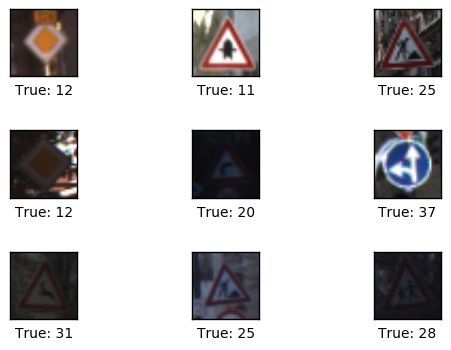

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plots 3 * 3 = 9 random images in training dataset
Helper.plot_images(3, x_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Distribution of classes in the dataset
# It shows there are difference on number of images per class


# I changed color scehemes but the best result is given by RGB color scheme
# Helper.rgb_to_hls(x_test)
# Helper.rgb_to_hls(x_train)
# Helper.rgb_to_yuv(x_test)
# Helper.rgb_to_yuv(x_train)
# Also I tried with normalized data as well. My normalization code is in Model class so, I will call that code
# when its needed

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**I tried many different preprocessing like it can be seen from above. However, I ended up using only one. I created extra data from the existed data to eleminate the bias problem in the dataset, this approach increased the accuracy of the final model.

I get the best acuracy with this model and parameters on RGB images, so I chose this model.

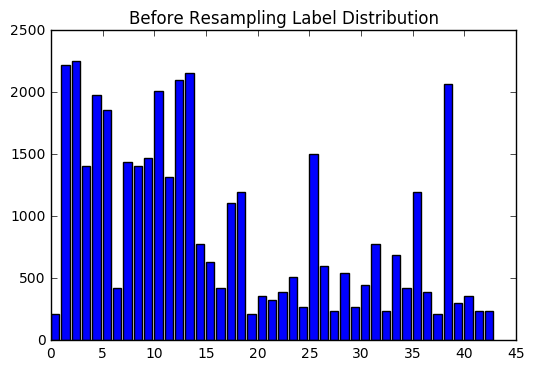

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from itertools import groupby
frequency = [len(list(group)) for key, group in groupby(y_train)]
vals = np.arange(0, 43)
Helper.plot("Before Resampling Label Distribution", vals, frequency)

Resampling Data..
Resampling is done..


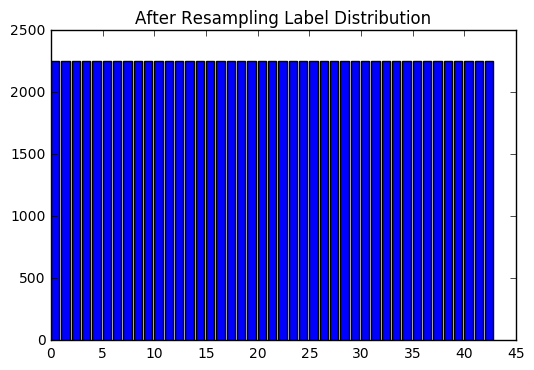

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
x_train, y_train = Helper.resample_data(x_train, unique, counts)
frequency = [len(list(group)) for key, group in groupby(y_train)]
vals = np.arange(0, 43)
Helper.plot("After Resampling Label Distribution", vals, frequency)

y_train = Helper.one_hot_encoder(y_train, 43)
y_test = Helper.one_hot_encoder(y_test, 43)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**In the Model.py(divide_train_val()), sklearn train_test_split to divide data into two parts as train and validation. I used 0.05% of train data as validation data. This fnction is called in the Model class train function.

self.x_train, self.valid_features, self.y_train, self.valid_labels = train_test_split(
            self.x_train,
            self.y_train,
            test_size=0.05)


For the additional data, I used affine transformation (rotation, translation and sheer). I used the code shared on CarND forum to resample my data.

Two dataaset, have some angle and transformation differences, and all classes have same number of images.

Also, I one_hot_encode the y values to be able to use it in the model.


In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
print("My architecture code can be seen in the Model.py file. Please look at the Github link")
model = Shallow3(x_train, y_train, x_test, y_test, 
                 epoch=100, learning_rate=1e-3, batch_size=128, normalized=False)

My architecture code can be seen in the Model.py file. Please look at the Github link


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I tried many different models. These models can be seen in the Model.py file. But the model I used for this homework is Shallow3() model.

Shallow3 Model:

First Layer: Convolution Filter Size=3x3 #of Filters=32 + RELU

Second Layer: Convolution Filter Size=3x3 #of Filters=64 + 2x2 Max Pooling + RELU

Third Layer: Convolution Filter Size=3x3 #of Filters=32 + 2x2 Max Pooling + RELU

Fouth Layer: Convolution Filter Size=5x5 #of Filters=32 + 2x2 Max pooling + RELU

Fifth Layer: Convolution Filter Size=1x1 #of Filters=16 + 2x2 Max Pooling + RELU

Flattening The Layer

Fully Connected Layer: Size=512 + RELU

Dropout: 0.5

Fully Connected Layer: Size=43

Softmax

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
model.train()


  1%|          | 1/100 [00:19<32:53, 19.94s/it]

Optimization Iteration:      1, Training Accuracy:  75.0%
Optimization Iteration:      1, Validation Accuracy:  76.3%


 11%|█         | 11/100 [03:24<27:30, 18.55s/it]

Optimization Iteration:     11, Training Accuracy: 100.0%
Optimization Iteration:     11, Validation Accuracy:  96.8%


 21%|██        | 21/100 [06:28<24:14, 18.42s/it]

Optimization Iteration:     21, Training Accuracy: 100.0%
Optimization Iteration:     21, Validation Accuracy:  98.3%


 31%|███       | 31/100 [09:30<20:59, 18.25s/it]

Optimization Iteration:     31, Training Accuracy: 100.0%
Optimization Iteration:     31, Validation Accuracy:  97.5%


 41%|████      | 41/100 [12:31<17:52, 18.18s/it]

Optimization Iteration:     41, Training Accuracy: 100.0%
Optimization Iteration:     41, Validation Accuracy:  98.0%


 51%|█████     | 51/100 [15:32<14:46, 18.10s/it]

Optimization Iteration:     51, Training Accuracy: 100.0%
Optimization Iteration:     51, Validation Accuracy:  97.6%


 61%|██████    | 61/100 [18:32<11:43, 18.04s/it]

Optimization Iteration:     61, Training Accuracy: 100.0%
Optimization Iteration:     61, Validation Accuracy:  97.8%


 71%|███████   | 71/100 [21:31<08:41, 18.00s/it]

Optimization Iteration:     71, Training Accuracy: 100.0%
Optimization Iteration:     71, Validation Accuracy:  98.0%


 81%|████████  | 81/100 [24:30<05:41, 17.96s/it]

Optimization Iteration:     81, Training Accuracy: 100.0%
Optimization Iteration:     81, Validation Accuracy:  97.9%


 91%|█████████ | 91/100 [27:28<02:40, 17.86s/it]

Optimization Iteration:     91, Training Accuracy: 100.0%
Optimization Iteration:     91, Validation Accuracy:  96.7%


100%|██████████| 100/100 [30:08<00:00, 17.73s/it]


Model saved in file: ./Models/model.ckpt
Test Accuracy:  0.960706262877


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I use epoch=100, batch_size=128, and learning_rate=1e-3 for my model. Also, I used Adam optimizer

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I use multiple different models and multiple different color schemes. Some papers I read use YUV color space, so I use this color space to get results. Also, I think it might be benefitial to use HLS color space as well. Since, there are brigtness differences in the images, I thought this might work better. Also, I tried normalization as well. Also I both try with the biased data and resampled data as well.
Best Results I obtained:
Model: Shallow, Data type: Resampled, Color Space: RGB, Accuracy:0.84
Model: Shallow2, Data type: Resampled, Color Space: RGB, Accuracy:0.93
Model: Shallow3, Data type: Resampled, Color Space: YUV, Accuracy:0.93
Model: Shallow3, Data type: Not Sampled, Color Space: YUV, Accuracy:0.92
Model: Shallow3, Data type: Resampled, Color Space: HLS, Accuracy:0.92
Model: Shallow3, Data type: Resampled, Color Space: RGB, Accuracy:0.96 

I think the balancing the data has some effect on the accuracy. Also, making the models deepeer gave me better
results and normalization resulted with really poor performance.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
# Read signnames.csv file
flag = True
class_num = []
class_name = []
with open('./signnames.csv', 'r') as reader:
    for line in reader:
        if flag:
            flag = False
            continue
        line = line.strip().split(',')
        print(line[0], line[1])
        class_name.append(line[1])

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vechiles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vechiles
16 Vechiles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vechiles over 3.5 metric tons


In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Iterate over the Images folder and put all the images to a list
import os
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import re

print("Images I found on the internet")
images = []
for root, dirnames, filenames in os.walk("./Images"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (32, 32))
            images.append(image_resized)

Images I found on the internet


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Images I found on the internet are pretty simple and clear. There is no distortion on the images. However, some of them are out of classes. In other words, they will be missclassfied. However, some images are clearly a member of a class, so they are predicted correctly.

Results for images I found on the internet


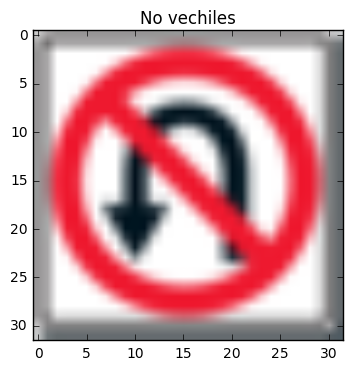

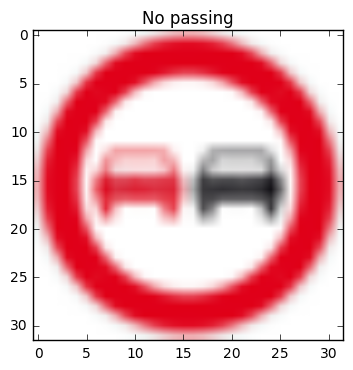

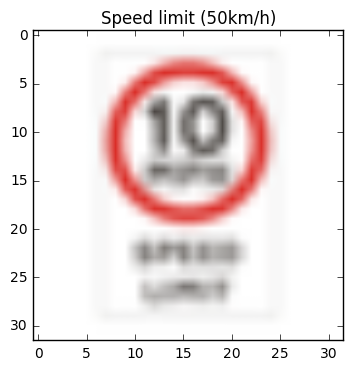

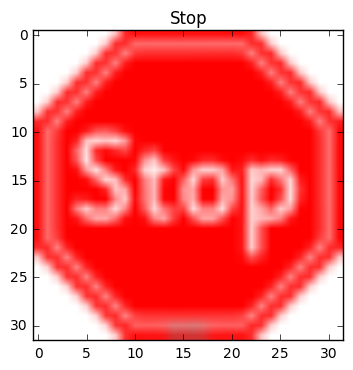

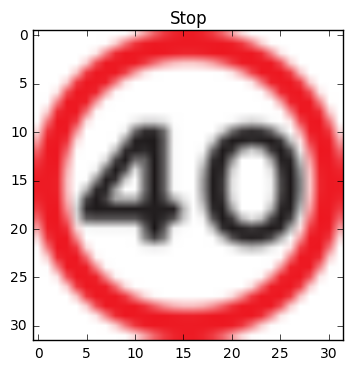

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
print("Results for images I found on the internet")
prob1, pred1 = model.predict(images)
last_layer = model.last_layer
top_five_internet = model.sess.run(tf.nn.top_k(prob1, k=5, sorted=True, name='top5'))
for i, p in enumerate(pred1):
    plt.figure()
    plt.title(class_name[p])
    plt.imshow(images[i])
plt.show()

Results for some images in the test set


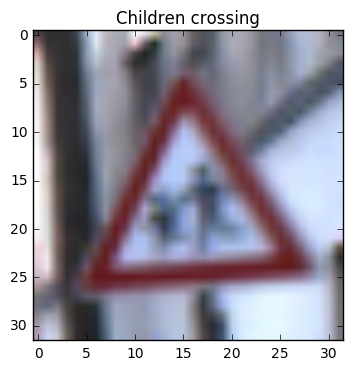

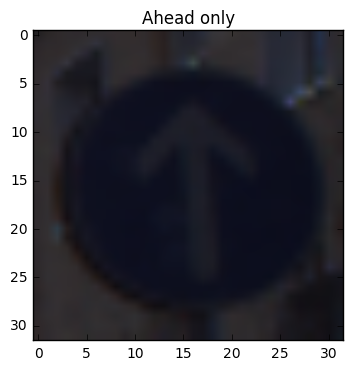

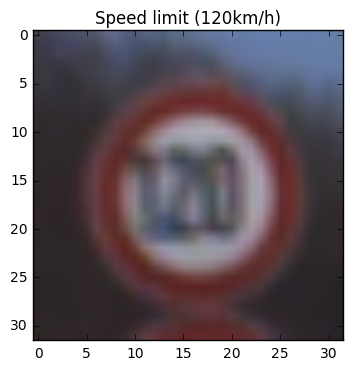

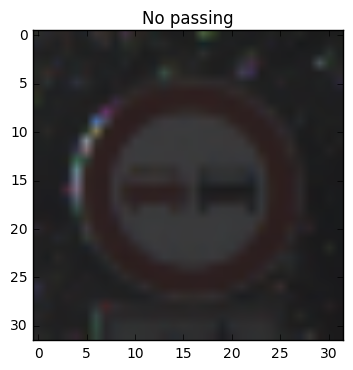

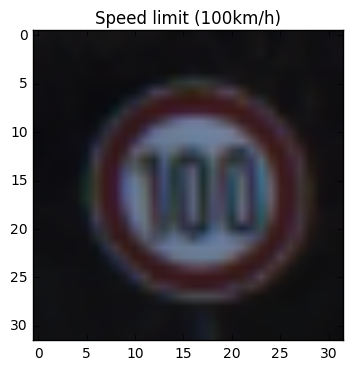

In [15]:
print("Results for some images in the test set")
images = []
images.append(x_test[1245])
images.append(x_test[3456])
images.append(x_test[4567])
images.append(x_test[7000])
images.append(x_test[11000])

prob, pred = model.predict(images)
# last_layer = model.last_layer
# top_five = model.sess.run(tf.nn.top_k(last_layer, k=5, sorted=True))

for i, p in enumerate(pred):
    plt.title(class_name[p])
    plt.imshow(images[i])
    plt.show() 


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model did a lot worse on the new dataset which is found on the internet. The reason is there is no relevant class in the training dataset. For example, there is no u-turn class in the training dataset.

Only 2 of image were in the classes soit is predicted well. Accuracy for new dataset is:0.4

Accuracy for manual test_dataset is: 1.0

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

print("Softmax probabilities for internet based images")
print(prob1)


Softmax probabilities for internet based images
[[  7.75739312e-01   6.76412433e-02   4.30938792e-12   6.08694791e-07
    5.87842986e-02   7.25592486e-07   3.44007390e-07   2.05731067e-05
    5.38607920e-03   8.35459346e-09   2.34660384e-28   1.91087065e-06
    3.67969292e-27   2.95630797e-21   1.10316996e-12   5.46543959e-07
    4.58971423e-04   7.18051336e-18   1.86855882e-08   2.07768699e-06
    6.13200879e-11   3.77784097e-08   3.14519352e-12   2.86662021e-06
    1.07628861e-02   4.31747765e-07   3.45788925e-10   5.01783751e-02
    3.09899114e-02   2.81643570e-05   7.87004524e-07   4.42201243e-19
    1.21562325e-08   9.45895813e-21   1.69170451e-21   0.00000000e+00
    2.22557094e-28   1.17143774e-22   7.06490412e-18   2.58659640e-21
    1.52603031e-16   4.50091697e-09   3.36443143e-22]
 [  8.93332847e-21   2.78966258e-22   0.00000000e+00   2.87379589e-21
    7.58118307e-36   0.00000000e+00   0.00000000e+00   0.00000000e+00
    9.34880520e-29   2.05168354e-17   1.77402416e-35   0.0

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** When I look at the top 3 results, I see third and fourth images my model predict with realy high probability. For the, first, second and fifth images my model is unsure or worse than third and fourth. Since for the unsure images, there is no correct class in given classes, my model could not predict in top 3(these classes does not exist in the training data)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [13]:
print("Top Three results for predictions for internet based images")
print(model.sess.run(tf.nn.top_k(prob1, k=3, sorted=True, name='top5')))

Top Three results for predictions for internet based images
TopKV2(values=array([[  7.75739312e-01,   6.76412433e-02,   5.87842986e-02],
       [  5.03910482e-01,   4.96089548e-01,   1.03235075e-12],
       [  9.96787310e-01,   2.09759129e-03,   8.78004648e-04],
       [  1.00000000e+00,   6.53776275e-28,   0.00000000e+00],
       [  7.61121452e-01,   8.74887332e-02,   7.82566369e-02]], dtype=float32), indices=array([[ 0,  1,  4],
       [15, 14, 26],
       [ 2,  1,  3],
       [14, 29,  0],
       [ 0, 15,  3]], dtype=int32))


In [16]:
model.Destruct()